In [1]:
import wdlen
from nltk.corpus.reader import CHILDESCorpusReader
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import slope

In [2]:
corpus_root = nltk.data.find( 'corpora/CHILDES/Eng-NA-MOR/')
Manchester = CHILDESCorpusReader(corpus_root, 'Manchester/.*.xml')
wdlen_list = wdlen.wordlenth(Manchester)

In [3]:
df = pd.DataFrame(wdlen_list).dropna()
df = df[['fname', 'age', 'one','two','three', 'four', 'five']]

In [22]:
df

,fname,age,one,two,three,four,five
0,Manchester/anne/anne01a.xml,22,130,56,12,0,0
1,Manchester/anne/anne01b.xml,22,177,95,19,0,0
2,Manchester/anne/anne02a.xml,23,192,158,40,5,1
3,Manchester/anne/anne02b.xml,23,222,142,35,4,0
4,Manchester/anne/anne03a.xml,23,263,87,39,10,2
5,Manchester/anne/anne03b.xml,23,181,87,29,13,1
6,Manchester/anne/anne04a.xml,23,257,106,47,12,5
7,Manchester/anne/anne04b.xml,23,217,84,45,9,2
8,Manchester/anne/anne05a.xml,24,177,114,52,12,2
9,Manchester/anne/anne05b.xml,24,215,131,45,13,0


In [119]:
df['sum'] = df.loc[:, 'one':'five'].sum(axis = 1)

In [120]:
df_per = df

In [121]:
df_per.loc[:, "one":"five"] = df.loc[:,"one":"five"].div(df["sum"], axis=0)

In [49]:
df_per = df_per.drop(['sum'], axis = 1)

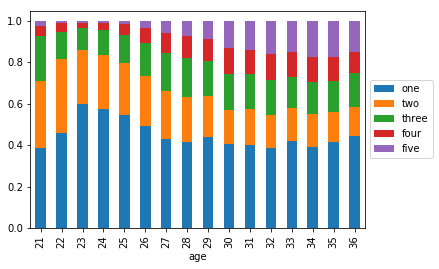

In [74]:
ax = df_per.groupby('age').mean().plot.bar(stacked = True, legend = 'reverse')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

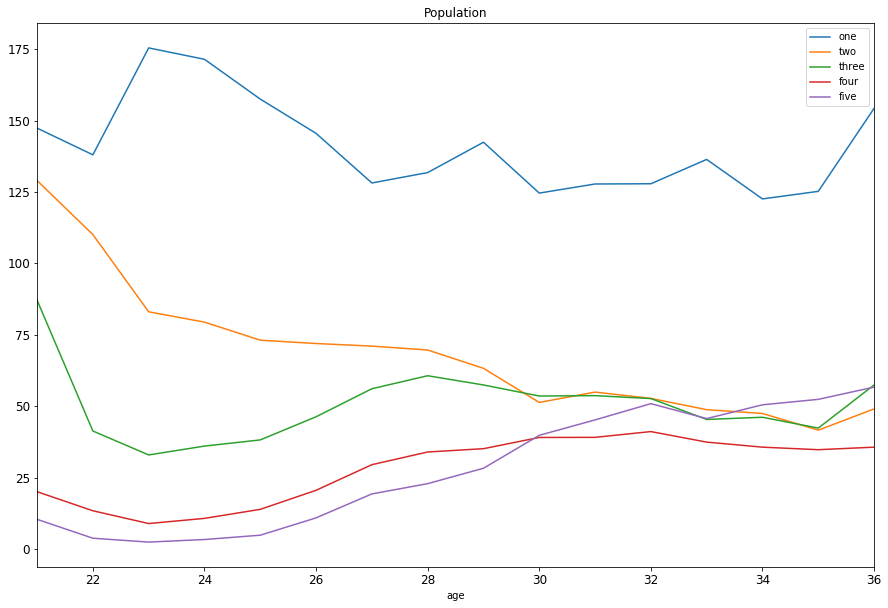

In [4]:
plt.figure()
df2 = df.groupby('age').mean().reset_index()
df2.set_index('age').plot.line(rot=0, title='Population', figsize=(15,10), fontsize=12)
plt.show()

## without one-word utterances

In [71]:
df_no1 = df.drop('one', axis = 1)

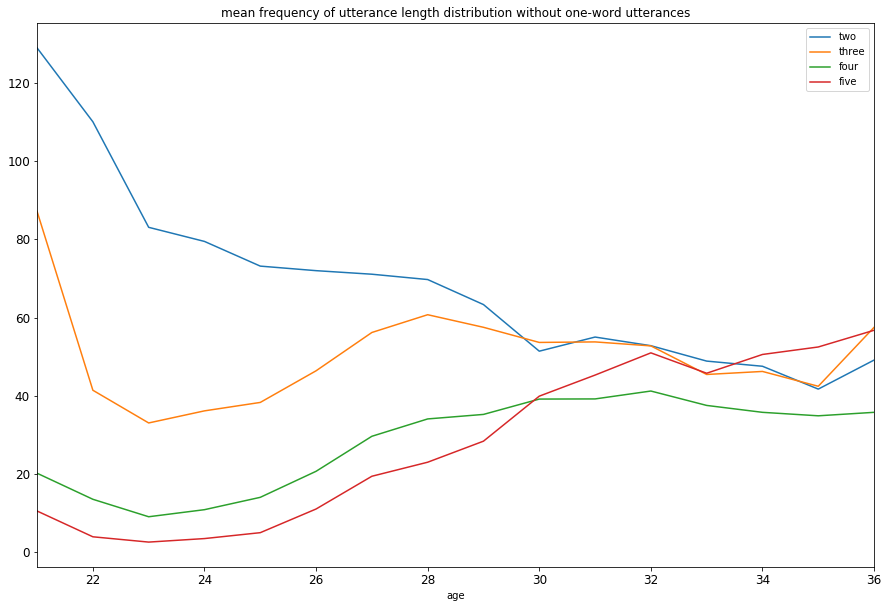

In [15]:
plt.figure()
df2_no1 = df_no1.groupby('age').mean().reset_index()
df2_no1.set_index('age').plot.line(rot=0, title='mean frequency of utterance length distribution without one-word utterances', figsize=(15,10), fontsize=12)
plt.show()

In [72]:
df_no1["sum"] = df_no1.loc[:, 'two':'five'].sum(axis=1)

In [73]:
df_perno1 = df_no1
df_perno1.loc[:, 'two':'five'] = df_no1.loc[:,"two":"five"].div(df_no1["sum"], axis=0)

In [74]:
df_perno1 = df_perno1.drop('sum', axis = 1)

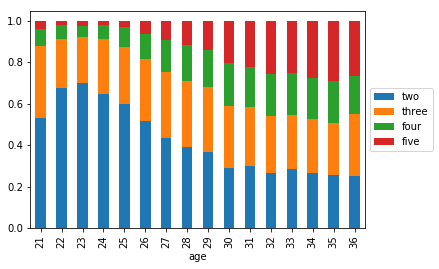

In [76]:
ax = df_perno1.groupby('age').mean().plot.bar(stacked = True, legend = 'reverse')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## plot per child

In [38]:
def per_child(df, name, group):
    ax = df.loc[df['corpus'] == name].groupby(group).mean().plot.bar(stacked = True, legend = True, title = name)
    handles, labels= ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

### with one-word utterances and no adjustment on age

In [75]:
df_per['corpus'] = df_per.fname.str[0:-7]

In [76]:
children = df_per.corpus.unique()

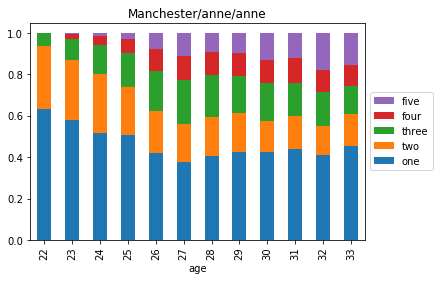

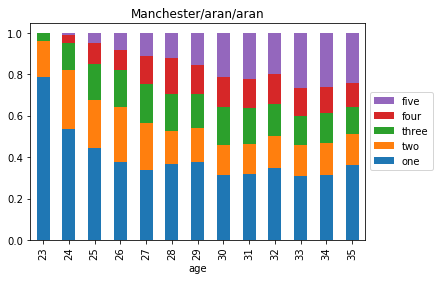

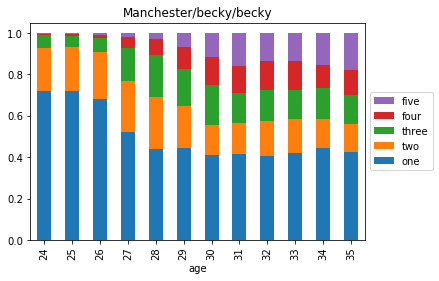

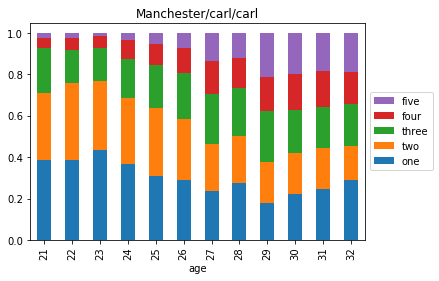

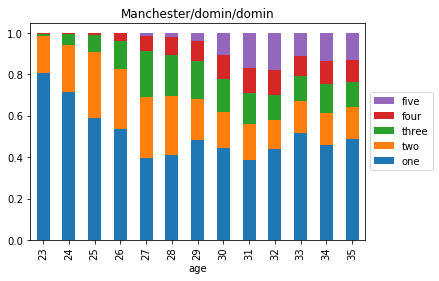

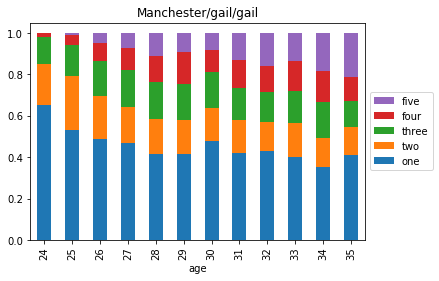

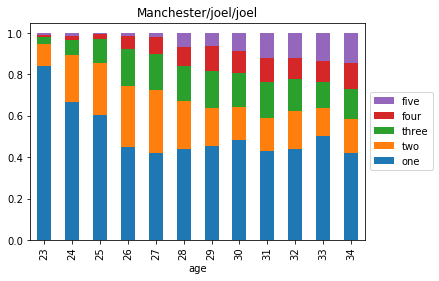

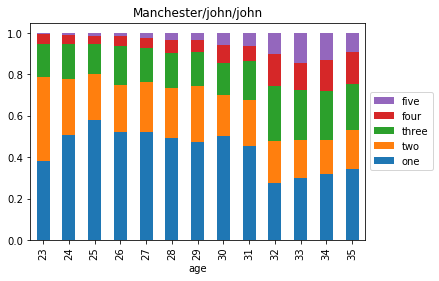

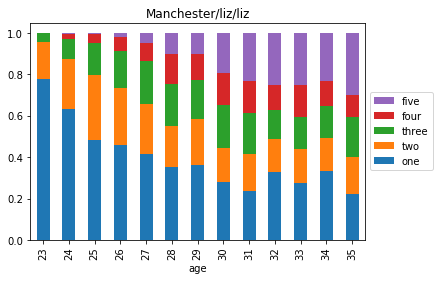

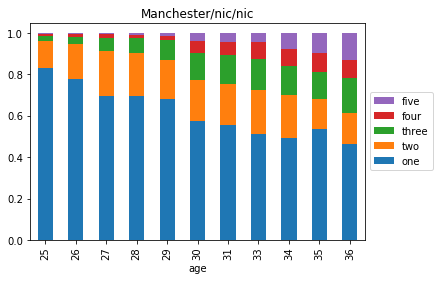

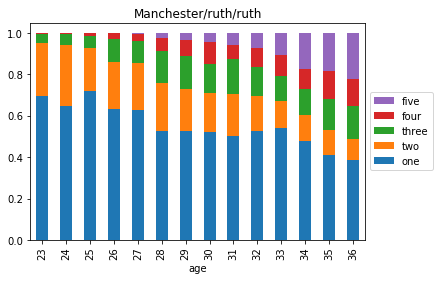

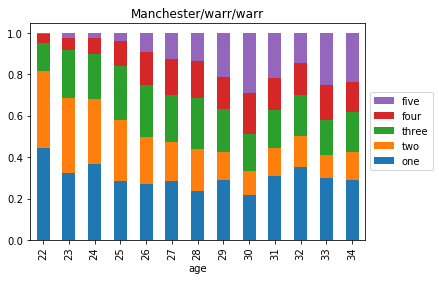

In [52]:
for child in children:
    per_child(df_per, child, 'age')

### without one-word utterances and no adjustment on age

In [77]:
df_perno1['corpus'] = df_perno1.fname.str[0:-7]

In [78]:
children = df_perno1.corpus.unique()

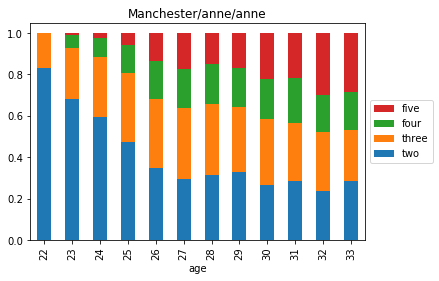

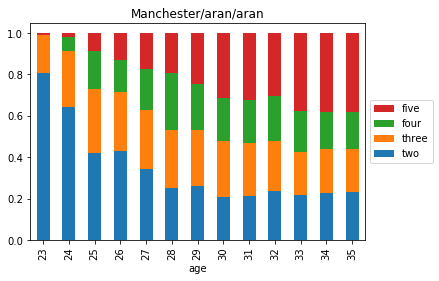

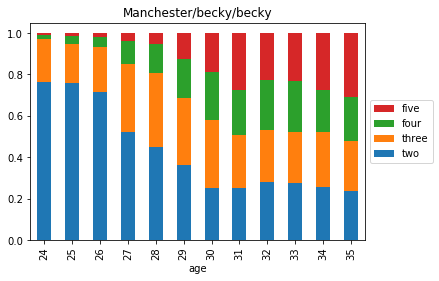

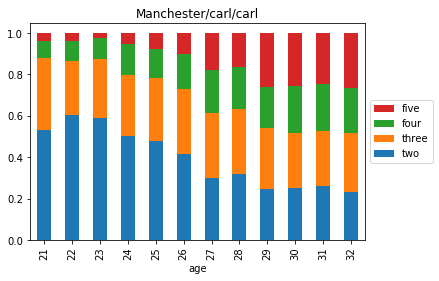

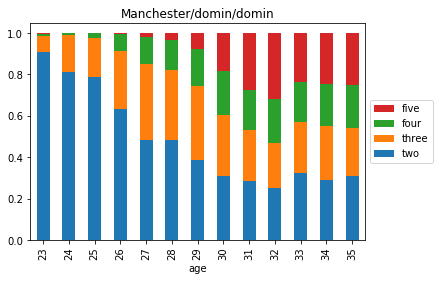

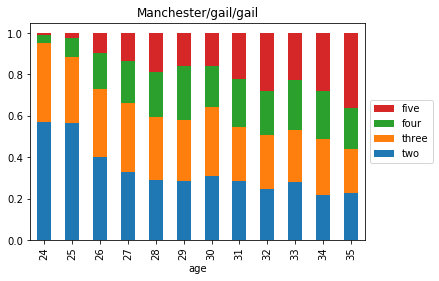

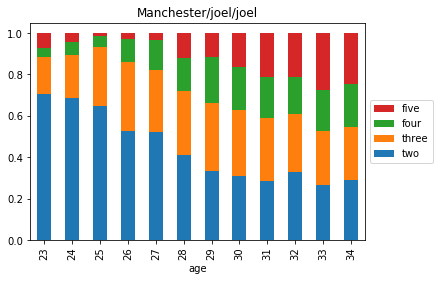

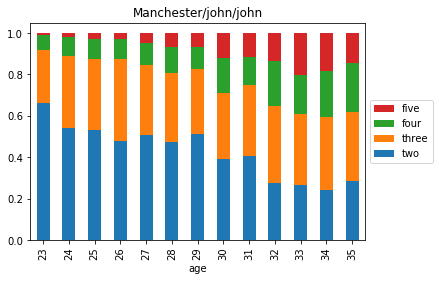

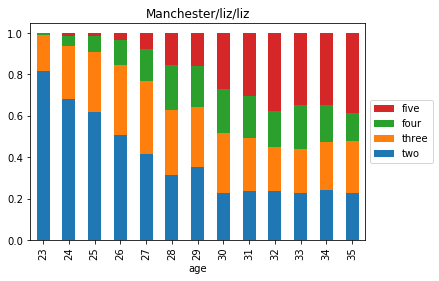

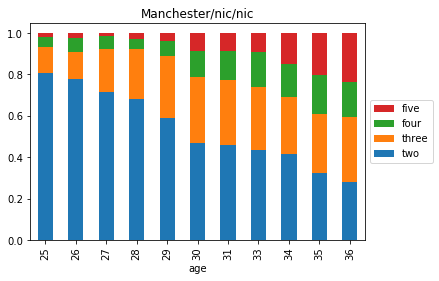

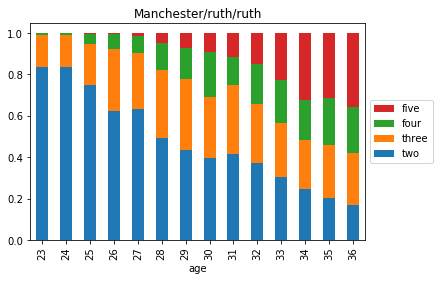

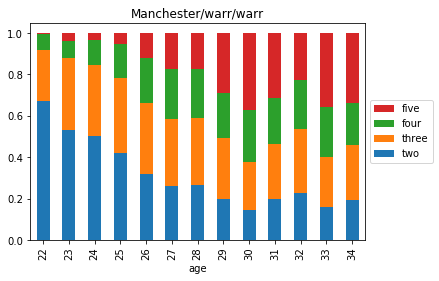

In [79]:
for child in children:
    per_child(df_perno1, child, 'age')

### With one-word utterances and adjustment on ages

In [81]:
df_age1 = df.groupby('age').count()

In [2]:
df_age = pd.read_excel('Manchester.xlsx')

In [84]:
df_age2 = df_age.groupby('age.1').count()

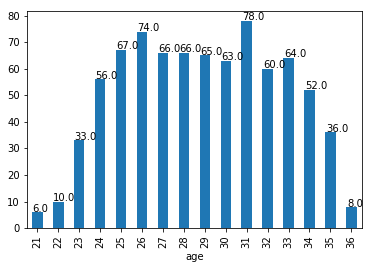

In [82]:
# Before coelescing ages
ax = df_age1['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

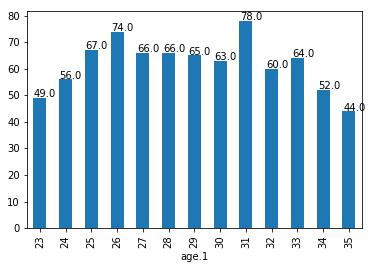

In [85]:
# After coelescing ages
ax = df_age2['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [26]:
df_age['corpus'] = df_age.fname.str[0:-7]

In [3]:
df_age = df_age.drop('age', axis = 1)

In [92]:
df_perage = df_age
df_perage['sum'] = df_age.loc[:, 'one':'five'].sum(axis = 1)

In [93]:
df_perage.loc[:, 'one':'five'] = df_age.loc[:, 'one':'five'].div(df_age['sum'], axis = 0)
df_perage = df_perage.drop(['sum'], axis = 1)

In [95]:
children = df_age.corpus.unique()

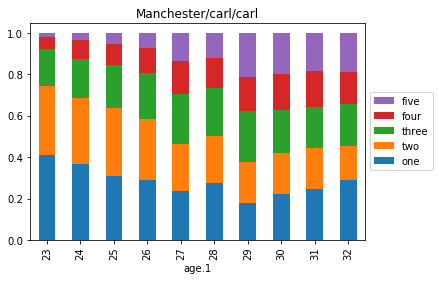

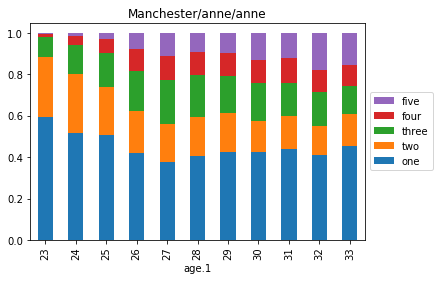

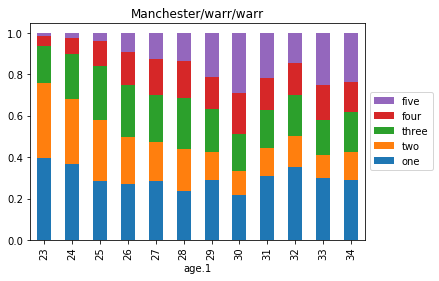

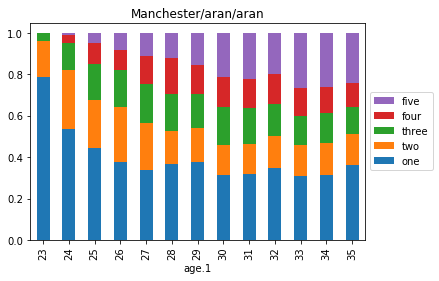

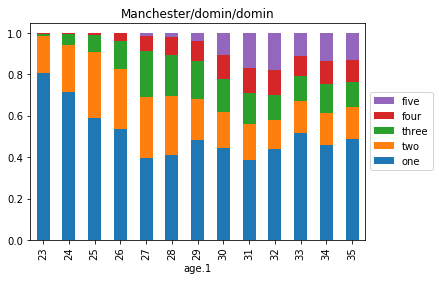

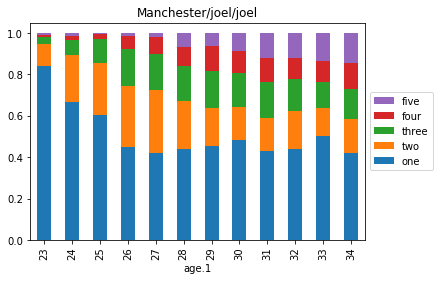

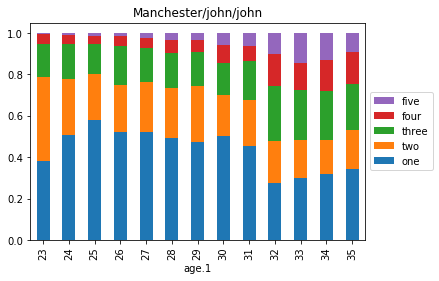

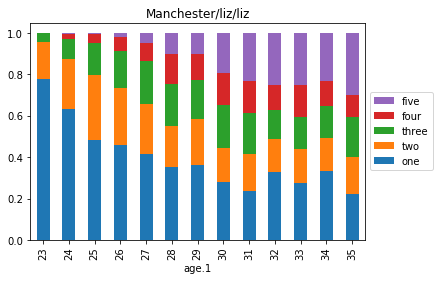

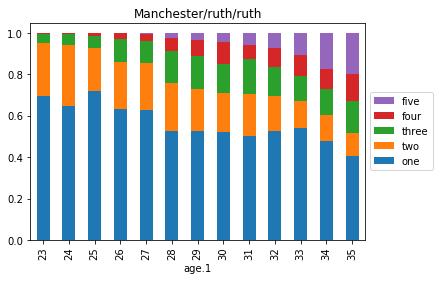

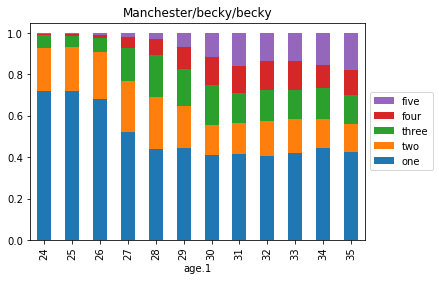

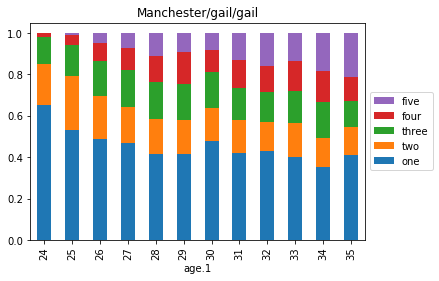

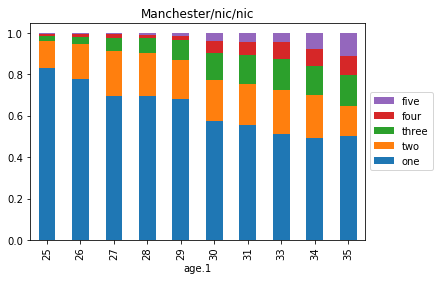

In [96]:
for child in children:
    per_child(df_perage, child, 'age.1')

### Without one-word utterances but with the adjustment on ages

In [4]:
df_perageno1 = df_age.drop('one', axis = 1)

In [5]:
df_perageno1['sum'] = df_perageno1.loc[:, 'two':'five'].sum(axis = 1)

In [6]:
df_perageno1.loc[:, 'two':'five'] = df_perageno1.loc[:, 'two':'five'].div(df_perageno1['sum'], axis = 0)

In [7]:
df_perageno1 = df_perageno1.drop('sum', axis = 1)

In [113]:
children = df_perageno1.corpus.unique()

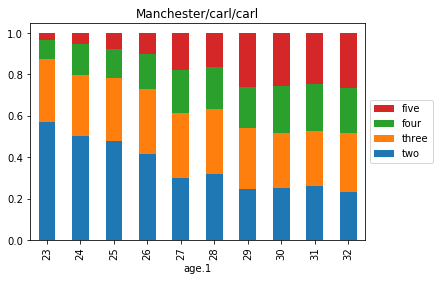

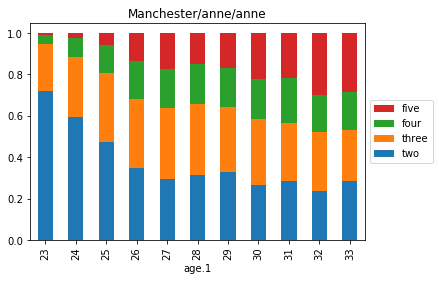

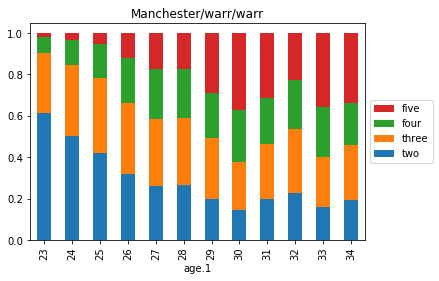

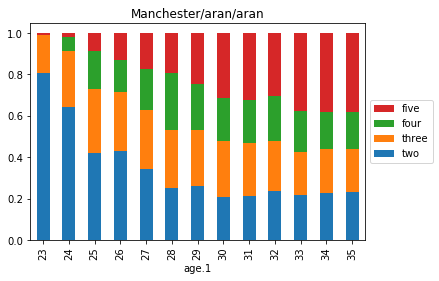

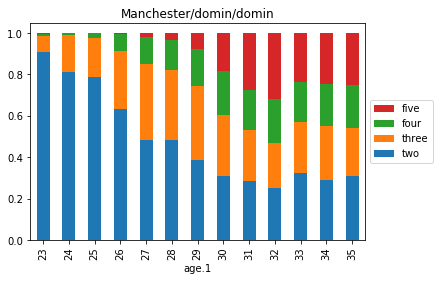

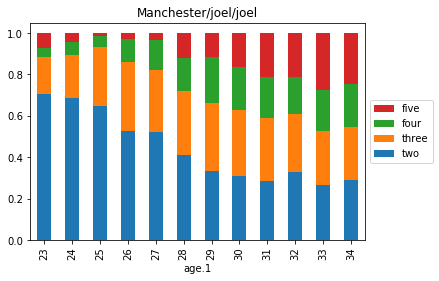

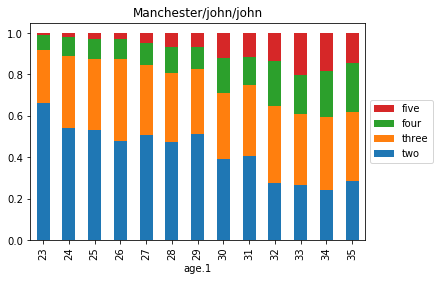

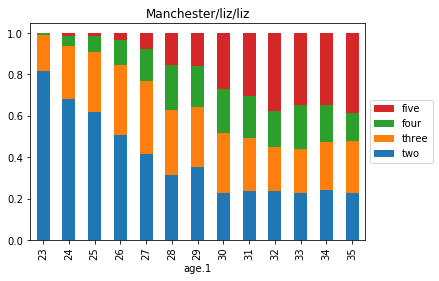

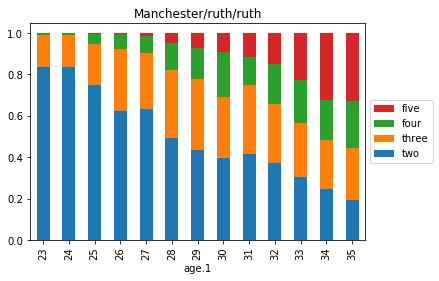

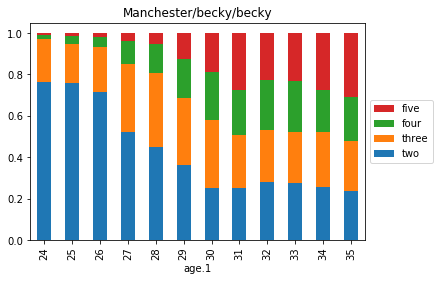

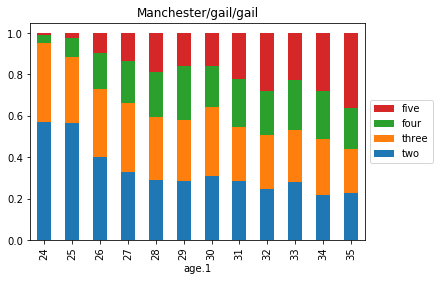

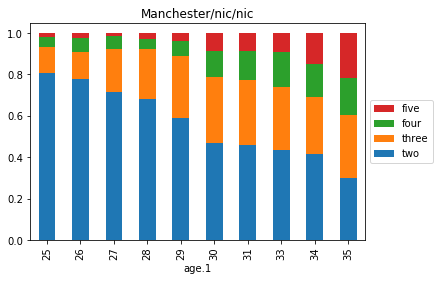

In [114]:
for child in children:
    per_child(df_perageno1, child, 'age.1')

# Plot adult

In [4]:
wdlen_mother = wdlen.wdlen_mother(Manchester)

## frequency and proportion plot with one word utterances

In [21]:
df_mother = pd.DataFrame(wdlen_mother).dropna()
df_mother = df_mother[['fname', 'age', 'one','two','three', 'four', 'five']]

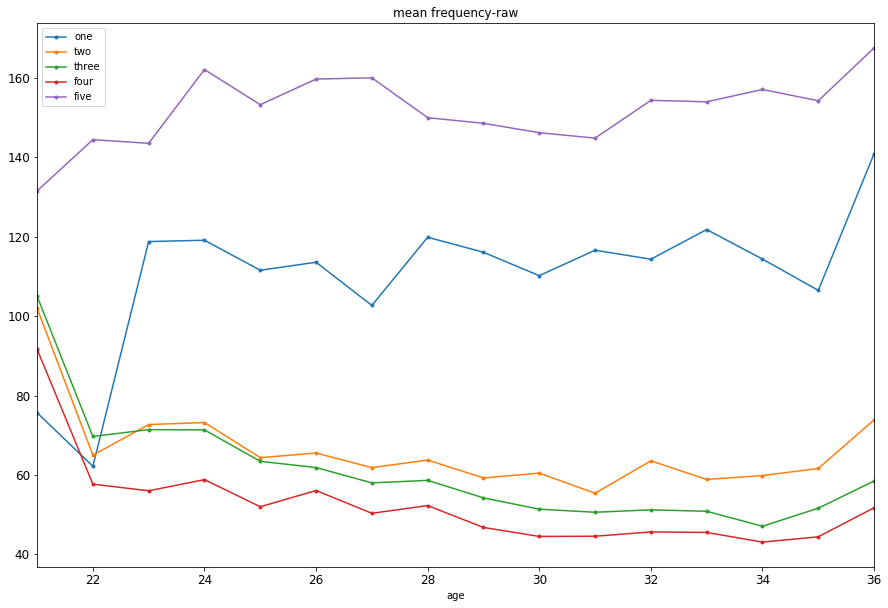

In [27]:
plt.figure()
df2_mother = df_mother.groupby('age').mean().reset_index()
df2_mother.set_index('age').plot.line(rot=0, title='mean frequency-raw', style='.-', markevery=1, figsize=(15,10), fontsize=12)
plt.show()

In [12]:
df_mother['sum'] = df_mother.loc[:, 'one':'five'].sum(axis = 1)

In [13]:
df_motherper = df_mother
df_motherper.loc[:, 'one':'five'] = df_mother.loc[:, 'one':'five'].div(df_mother['sum'], axis = 0)

In [16]:
df_motherper = df_motherper.drop('sum', axis = 1)

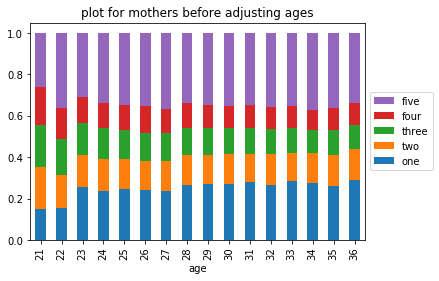

In [26]:
ax = df_motherper.groupby('age').mean().plot.bar(stacked = True, legend = True, title = 'plot for mothers before adjusting ages')
handles, labels= ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [23]:
writer = pd.ExcelWriter('Manchester_mother.xlsx')
df_motherper.to_excel(writer,'Sheet1')
writer.save()

In [24]:
df_mother_ageper = pd.read_excel('Manchester_mother.xlsx')

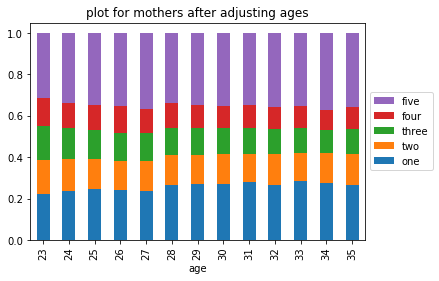

In [25]:
ax = df_mother_ageper.groupby('age').mean().plot.bar(stacked = True, legend = True, title = 'plot for mothers after adjusting ages')
handles, labels= ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Analyze slope difference

## Overall slope difference(after adjusting ages)

In [10]:
slope.max_slope(df_perageno1, 23, 35)

{30}

## slope difference for each child(after adjusting ages)

In [8]:
df_perageno1['corpus'] = df_perageno1.fname.str[0:-7]

In [9]:
children = df_perageno1.corpus.unique()

In [11]:
for child in children:
    print(slope.per_child_max(df_perageno1, child))

{30}
{30}
{30}
{30}
{30}
{30}
{30}
{30}
{30}
{30}
{30}
{27}
